In [7]:
import numpy as np
import pandas as pd
import scipy.stats as st

from scipy.stats import linregress
import gmaps

import json
import requests
from pprint import pprint

import matplotlib.pyplot as plt

import requests

from config import gkey
gmaps.configure(api_key=gkey)

In [2]:
filepath='Resources/hardship_data_heatmap.csv'
hardship_data_heatmap= pd.read_csv(filepath,index_col=0)
hardship_data_heatmap

,Name,GEOID,Population,Longitude,Latitude,2015-2019,2011-2015,Difference between Time Frames
0,Rogers Park,1,52772,-87.670171,42.009630,61.630585,64.741637,23.096090
1,Norwood Park,10,41109,-87.803451,41.985248,22.139738,25.624614,22.722266
2,Jefferson Park,11,26201,-87.771165,41.978836,38.304424,47.049867,17.461699
3,Forest Glen,12,19579,-87.758358,41.993938,16.696647,16.568261,26.335528
4,North Park,13,17522,-87.723578,41.983651,50.364721,46.624422,29.947440
...,...,...,...,...,...,...,...,...
72,Morgan Park,75,21714,-87.669062,41.689729,53.120251,53.940465,25.386928
73,O'Hare,76,14416,-87.893699,41.975696,58.918869,60.423957,24.702054
74,Edgewater,77,47343,-87.663419,41.986719,26.803564,31.441967,21.568738
75,Near North Side,8,95467,-87.633318,41.899611,3.920002,8.996390,21.130754


In [3]:
## Analysis and visualization of hardship data

filepath='Resources/hardship_locations_heatmap.csv'
hardship_locations_data_heatmap= pd.read_csv(filepath,index_col=0)
hardship_locations_data_heatmap

,Latitude,Longitude
0,42.009630,-87.670171
1,41.985248,-87.803451
2,41.978836,-87.771165
3,41.993938,-87.758358
4,41.983651,-87.723578
...,...,...
72,41.689729,-87.669062
73,41.975696,-87.893699
74,41.986719,-87.663419
75,41.899611,-87.633318


In [4]:
hardship = hardship_data_heatmap["Difference between Time Frames"].astype(float)
maxhardship = hardship.max()
locations = hardship_data_heatmap[["Latitude", "Longitude"]].astype(float)

figure_layout = {
   'width': '400px',
   'width': '300px',
   'border': '1px solid black',
   'padding': '1px'
}


fig = gmaps.figure(layout=figure_layout)
hardship_layer = gmaps.heatmap_layer(locations, weights=hardship, dissipating = False, 
                                     max_intensity = maxhardship, point_radius = .03)

fig.add_layer(hardship_layer)

fig

Figure(layout=FigureLayout(border='1px solid black', height='420px', padding='1px', width='300px'))

In [5]:
## Analysis and visualization of suicide and vacancy data

filepath = 'Resources/suicide_vacant_2011.csv'
suicide_vacant_2011 = pd.read_csv(filepath, index_col =0)
suicide_vacant_2011

,Suicide Mortality Rate,Vacant Housing Units
0,7.4,13.829714
1,8.9,8.674336
2,15.5,7.264864
3,7.3,7.156233
4,4.9,5.767573
...,...,...
72,9.7,9.896714
73,4.4,5.682359
74,9.4,10.609375
75,9.9,13.527900


y = -0.97x + 20.16
The r-value is: -0.42353804536783835


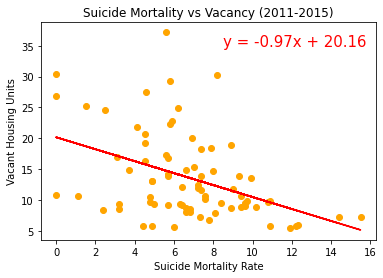

In [8]:
x_values = suicide_vacant_2011['Suicide Mortality Rate']
y_values = suicide_vacant_2011['Vacant Housing Units']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
plt.scatter(x_values,y_values,color='orange')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(8.5,35),fontsize=15,color="red")
plt.xlabel('Suicide Mortality Rate')
plt.ylabel('Vacant Housing Units')
plt.title("Suicide Mortality vs Vacancy (2011-2015)")

correlation = st.pearsonr(x_values,y_values)
print(f"The r-value is: {correlation[0]}")

plt.savefig('Images/suicide_vacant_2011.png',format='png')

plt.show() 

In [9]:
filepath = 'Resources/suicide_vacant_2019.csv'
suicide_vacant_2019 = pd.read_csv(filepath, index_col =0)
suicide_vacant_2019

,Suicide Mortality Rate,Vacant Housing Units
0,9.9,10.638248
1,12.7,4.354325
2,11.8,7.927394
3,3.5,4.115101
4,11.7,6.047908
...,...,...
72,7.0,10.283461
73,8.7,5.102151
74,11.1,9.192521
75,11.9,13.589030


y = -0.61x + 16.59
The r-value is: -0.3764039514733627


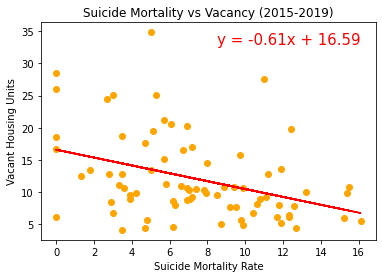

In [10]:
x_values = suicide_vacant_2019['Suicide Mortality Rate']
y_values = suicide_vacant_2019['Vacant Housing Units']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
plt.scatter(x_values,y_values,color='orange')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(8.5,33),fontsize=15,color="red")
plt.xlabel('Suicide Mortality Rate')
plt.ylabel('Vacant Housing Units')
plt.title("Suicide Mortality vs Vacancy (2015-2019)")

correlation = st.pearsonr(x_values,y_values)
print(f"The r-value is: {correlation[0]}")

plt.savefig('Images/suicide_vacant_2019.png',format='png')

plt.show() 